In [17]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [6]:
submission = pd.read_csv('sample_submission.csv')

In [7]:
test = pd.read_csv('test.csv')

In [8]:
train = pd.read_csv('train.csv')

In [9]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [10]:
print("train :",len(train)," Null values of age in train :",train.age.isnull().sum())
print("test :",len(test)," Null values of age in test :",test.age.isnull().sum())

train : 73147  Null values of age in train : 27729
test : 31349  Null values of age in test : 11791


In [31]:
a = []
for j in train['is_pass']:
    if j==0 :
        a.append('yes')
    else:
        a.append('no')

In [11]:
train.drop(['id'],axis = 1, inplace =True)
test.drop(['id'],axis = 1, inplace =True)

In [12]:
train.columns

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

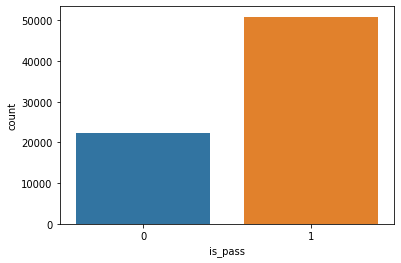

In [13]:
sns.countplot(train['is_pass']) ##### highly imbalanced class distribution

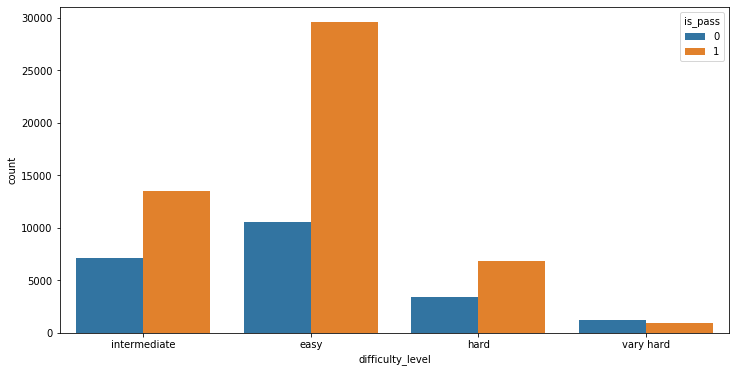

In [14]:
fig,ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='difficulty_level',data=train,hue='is_pass')

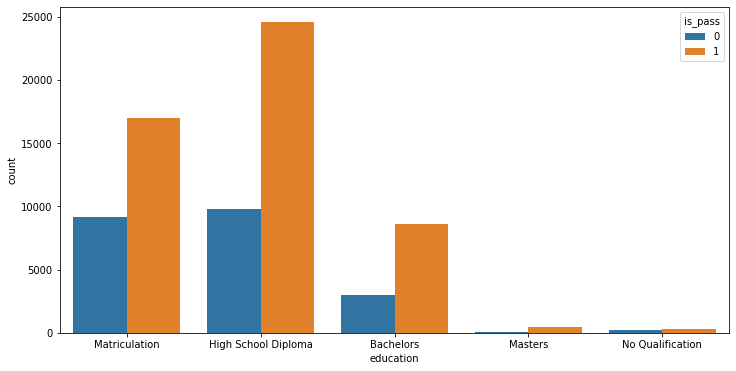

In [15]:
fig,ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='education',data=train,hue='is_pass')

In [16]:
impute = train['trainee_engagement_rating'].max()
train['trainee_engagement_rating'].fillna(impute,inplace = True)
test['trainee_engagement_rating'].fillna(impute,inplace = True)

In [17]:
impute = train['age'].median()
train['age'].fillna(impute,inplace = True)
test['age'].fillna(impute,inplace = True)

In [18]:
train['score'] = train['trainee_engagement_rating']*train['total_programs_enrolled']
test['score'] = test['trainee_engagement_rating']*test['total_programs_enrolled']
train.drop(['total_programs_enrolled'],axis = 1,inplace = True)
test.drop(['total_programs_enrolled'],axis = 1,inplace = True)

In [19]:
# sns.distplot(test['age'])
# train['age'] = train['age'].transform(np.log)
# test['age'] = test['age'].transform(np.log)

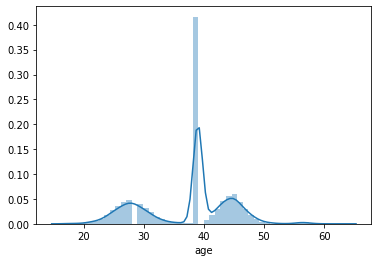

In [20]:
sns.distplot(train['age'])

In [26]:
train['program_duration'].value_counts()

134    13027
120    11130
136     9765
121     7679
122     7374
135     7267
131     6571
117     4266
133     3409
130     2659
Name: program_duration, dtype: int64

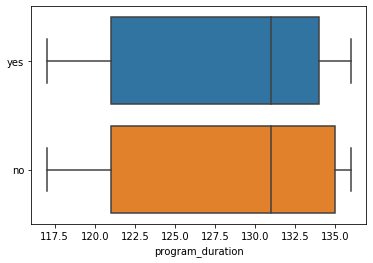

In [32]:
sns.boxplot(y=a,x = train['program_duration'])

In [149]:
obj_col = ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']

In [150]:
def encode_categorical(df, cols):
    for col in cols:
        # Leave NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = pd.Series(le.fit_transform(not_null), index=not_null.index)

    return df
train = encode_categorical(train,obj_col)
test = encode_categorical(test,obj_col)

In [151]:
# def one_hot_encoding(data,cols):
#     for col in cols:
#         encoded_columns = pd.get_dummies(data[col])
#         print(encoded_columns.columns)
#         data = data.join(encoded_columns,lsuffix='_left', rsuffix='_right').drop(col, axis=1)
#     return data
# train = one_hot_encoding(train,obj_col)
# test = one_hot_encoding(test,obj_col)

In [152]:
X,Y = train.drop('is_pass',axis=1), train['is_pass']

In [156]:
col_chi2 = ['program_id','program_type','program_duration','test_id','test_type','difficulty_level',
           'trainee_id','gender','education','city_tier','is_handicapped']

In [157]:
import scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [158]:
def chi2_test(data,col):
    contingency_table=pd.crosstab(data[col],data["is_pass"])
    
    
    Observed_Values = contingency_table.values 
    stat, p, dof, expected = chi2_contingency(contingency_table)
    #print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.99
    critical = chi2.ppf(prob, dof)
    #print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
#     if abs(stat) >= critical:
#         print('Dependent (reject H0)')
#     else:
#         print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    #print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print(col,' :Dependent (reject H0)')
    else:
        print(col,' :Independent (fail to reject H0)')

In [159]:
for col in col_chi2:
    chi2_test(train ,col)

program_id  :Dependent (reject H0)
program_type  :Dependent (reject H0)
program_duration  :Dependent (reject H0)
test_id  :Dependent (reject H0)
test_type  :Dependent (reject H0)
difficulty_level  :Dependent (reject H0)
trainee_id  :Dependent (reject H0)
gender  :Dependent (reject H0)
education  :Dependent (reject H0)
city_tier  :Dependent (reject H0)
is_handicapped  :Dependent (reject H0)


In [161]:
# to select k no. of best features from the available list of features 
from sklearn.feature_selection import SelectKBest
#using chi-square test
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [162]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [163]:
print(featureScores.nlargest(25,'Score')) 

               Specs          Score
6         trainee_id  311561.465847
3            test_id   11724.001291
12             score    4121.468912
0         program_id    1851.033701
5   difficulty_level    1066.257861
4          test_type    1000.023823
1       program_type     497.489879
8          education     390.529034
10               age     344.809548
9          city_tier     157.060425
11    is_handicapped      90.983131
7             gender      14.159040
2   program_duration       0.340394


In [164]:
# def Normalization(data):
#     numerical_col = [col for col in data.columns if col not in(obj_col)]
#     for c in data.columns:
#         if c !='is_pass':
#             data[c] = (data[c]-data[c].mean())/(data[c].std())
    
# Normalization(X)
# Normalization(test)
# X

In [165]:
#feature_selection = ['test_id','trainee_engagement_rating','program_id','difficulty_level','test_type','program_type','education','city_tier','is_handicapped']

In [166]:
# test =test[feature_selection]
# X = X[feature_selection]

In [167]:
X

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,is_handicapped,score
0,15,5,136,150,0,2,9389,1,3,3,24.0,0,5.0
1,2,1,131,44,0,0,16523,0,1,4,26.0,0,6.0
2,20,6,120,178,1,0,13987,1,3,1,40.0,0,2.0
3,3,1,117,32,0,0,13158,0,3,3,39.0,0,4.0
4,10,3,131,84,0,2,10591,0,1,1,42.0,0,8.0
5,4,1,134,23,0,2,12531,0,1,1,29.0,0,8.0
6,16,5,120,144,1,0,17874,1,0,2,48.0,0,9.0
7,6,2,134,61,1,0,8129,1,3,2,45.0,0,1.0
8,6,2,134,57,0,0,5652,1,3,4,39.0,0,9.0
9,15,5,136,153,0,1,17019,1,0,3,28.0,0,8.0


In [168]:
#train['program_type'].value_counts().plot(kind = 'bar')

In [169]:
train.describe()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,is_handicapped,is_pass,score
count,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000
mean,10.827129,3.268227,128.208676,91.079306,0.404719,0.791229,9843.079620,0.533761,1.585273,2.246845,37.444010,0.089819,0.695408,6.335106
std,5.994345,1.817236,6.889679,51.239048,0.490841,0.949212,5703.556093,0.498862,1.147639,1.011587,7.227199,0.285924,0.460238,4.996110
min,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,1.000000
25%,5.000000,1.000000,121.000000,45.000000,0.000000,0.000000,5040.000000,0.000000,1.000000,1.000000,30.000000,0.000000,0.000000,2.000000
50%,11.000000,3.000000,131.000000,90.000000,0.000000,0.000000,9641.000000,1.000000,1.000000,2.000000,39.000000,0.000000,1.000000,4.000000
75%,16.000000,5.000000,134.000000,135.000000,1.000000,2.000000,14552.000000,1.000000,3.000000,3.000000,43.000000,0.000000,1.000000,8.000000
max,21.000000,6.000000,136.000000,187.000000,1.000000,3.000000,20098.000000,1.000000,4.000000,4.000000,63.000000,1.000000,1.000000,70.000000


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [171]:
model = RandomForestClassifier()
model.fit(X,Y)
prediction = model.predict(test)
X.shape

(73147, 13)

In [172]:
# model=Sequential()
# model.add(Dense(50,input_dim=14,activation='relu'))
# model.add(Dense(25,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [173]:
#model.fit(X,Y,batch_size=50,epochs=10,verbose=1,validation_split=0.1)

In [175]:
submission['is_pass']=prediction

In [176]:
submission.to_csv('random_forest_with_score_2 features_removed.csv',index = False)

In [177]:
submission

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,0
3,7038_72,0
4,888_71,1
5,18922_62,1
6,5499_29,1
7,10150_125,1
8,10158_95,1
9,6215_17,1
